In [1]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
import glob

In [4]:
train_files=glob.glob("D:/data set/datset/xray/chest_xray/train/*/**")

In [5]:
len(train_files)

5216

In [6]:
train_files

['D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0115-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0117-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0119-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0122-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0125-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0127-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0128-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0129-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0131-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0133-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0135-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0137-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0140-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0141-0001

In [7]:
from random import shuffle
shuffle(train_files)
train_files

['D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0483-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\PNEUMONIA\\person421_bacteria_1852.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\PNEUMONIA\\person303_bacteria_1431.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\PNEUMONIA\\person436_bacteria_1883.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\NORMAL2-IM-1094-0001-0002.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\PNEUMONIA\\person272_virus_559.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\PNEUMONIA\\person450_virus_931.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\PNEUMONIA\\person284_virus_582.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\PNEUMONIA\\person1418_bacteria_3638.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\IM-0359-0001.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\PNEUMONIA\\person911_bacteria_2836.jpeg',
 'D:/data set/datset/xray/chest_xray/train\\NORMAL\\NORMAL2-IM-0838-0001.jpeg',
 'D:/data set/

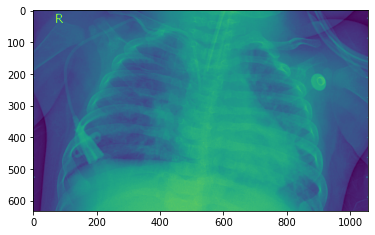

In [8]:
from PIL import Image
img=Image.open(train_files[45])
plt.imshow(img)

In [9]:
np.array(img).shape

(632, 1056)

In [10]:
img=img.resize((128,128))

In [11]:
np.array(img).shape

(128, 128)

In [12]:
grey_files=[]

In [13]:
 for i in train_files:
    img=Image.open(i).convert('L')
    img.save('greyscale.jpeg')
    grey_files.append(img)

In [14]:
np.array(grey_files[0]).shape

(1167, 1690)

In [15]:
modified_files=[]

In [16]:
for i in grey_files:
    img=i.resize((128,128))
    modified_files.append(img)

In [17]:
X_train=np.zeros((len(modified_files),128,128))
for i,fi in enumerate(modified_files):
    fi_array=np.array(fi)
    if(fi_array.shape[0]==128 and fi_array.shape[1]==128):
        X_train[i,:,:]=fi_array

In [18]:
X_train[0]

array([[31., 40., 55., ..., 63., 58., 50.],
       [30., 38., 53., ..., 61., 57., 47.],
       [28., 37., 50., ..., 59., 55., 46.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [19]:
X_train/255.0

array([[[0.12156863, 0.15686275, 0.21568627, ..., 0.24705882,
         0.22745098, 0.19607843],
        [0.11764706, 0.14901961, 0.20784314, ..., 0.23921569,
         0.22352941, 0.18431373],
        [0.10980392, 0.14509804, 0.19607843, ..., 0.23137255,
         0.21568627, 0.18039216],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.43137255, 0.42352941, 0.41176471, ..., 0.3254902 ,
         0.32941176, 0.31372549],
        [0.40784314, 0.41568627, 0.39607843, ..., 0.33333333,
         0.32941176, 0.28627451],
        [0.41176471, 0.40784314, 0.40392157, ..., 0.35294118,
         0.35294118, 0.28235294],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [20]:
Y_train=np.zeros((len(train_files)))
for i,fi in enumerate(train_files):
   
    if fi.find("NORMAL")!=-1:
        Y_train[i]=0.0
    elif fi.find("virus")!=-1:
        Y_train[i]=1.0
    elif fi.find("bacteria")!=-1:
        Y_train[i]=2.0

In [21]:
Y_train-1

array([-1.,  1.,  1., ..., -1., -1.,  1.])

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
from tensorflow.keras.layers import BatchNormalization

In [25]:
from keras.layers import Dropout

In [26]:
model=Sequential()
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),strides=1,padding='Same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),strides=1,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),strides=1,padding='Same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3,activation="softmax"))

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0

In [29]:
X_train=X_train.reshape(len(X_train),128,128,1)

In [30]:
X_train.shape

(5216, 128, 128, 1)

In [31]:
Y_train.shape

(5216,)

In [34]:
model.fit(X_train, Y_train,epochs=15,validation_split=0.1)

Epoch 1/15
147/147 [==============================] - 37s 249ms/step - loss: 0.4675 - accuracy: 0.7906 - val_loss: 0.5640 - val_accuracy: 0.7433
Epoch 2/15
147/147 [==============================] - 35s 236ms/step - loss: 0.4599 - accuracy: 0.8000 - val_loss: 0.6430 - val_accuracy: 0.7337
Epoch 3/15
147/147 [==============================] - 36s 244ms/step - loss: 0.4521 - accuracy: 0.8053 - val_loss: 0.5175 - val_accuracy: 0.7586
Epoch 4/15
147/147 [==============================] - 34s 231ms/step - loss: 0.4403 - accuracy: 0.8085 - val_loss: 0.5727 - val_accuracy: 0.7931
Epoch 5/15
147/147 [==============================] - 34s 235ms/step - loss: 0.4244 - accuracy: 0.8085 - val_loss: 0.5484 - val_accuracy: 0.7586
Epoch 6/15
147/147 [==============================] - 34s 232ms/step - loss: 0.4191 - accuracy: 0.8095 - val_loss: 0.4738 - val_accuracy: 0.8008
Epoch 7/15
147/147 [==============================] - 34s 232ms/step - loss: 0.4024 - accuracy: 0.8159 - val_loss: 0.4608 - val_ac